<h1 style="text-align: center;">¿Se puede predecir el comportamiento criminal?</h1>

<center><img src="./img/crime.jpg"/></center>

<h4>Motivación</h4>
En el presente trabajo se analizan un conjunto de datos de reportes donde se detallan los crímenes de Estados Unidos de América comprendidos entre los años 1980 y 2014. Todos los datos presentados son parte de una extensión del trabajo de "Murder Accountability Project". Además, se encuentra incluída una columna, en la cual, se detallan los estados en los que fueron cometidos, para lograr una fácil representación geográfica de los mismos.
El proyecto "The Murder Accountability Project" es la más completa base de datos de homicidios en Estados Unidos de América, que se encuentra disponible hasta la fecha. Este dataset incluye asesinatos de los archivos del FBI desde 1975 hasta el presente y también contiene información libre de más de 22.000 homicidios que no fueron reportados al departamento de justicia de los Estados Unidos. Este dataset incluye edad, grupo étnico, sexo de los asesinos, como también de las víctimas. También, se incluye la relación entre ellos y el arma utilizada.
Tambien para la realizacion del analisis exploratorio de datos nos apoyamos en los datos obtenidos de la API del FBI, la cual tiene los datos de los años posteriores al 2014 en linea con el primer dataset.

El objetivo del estudio de los datos es conocer si se puede detectar el comportamiento de los asesinos y evitar que se produzcan nuevos homicidios a futuro. En este sentido la principal hipótesis seria:

- ¿Es posible predecir el comportamiento criminal?

Para ello podemos plantear ciertas preguntas, con el objetivo de sacar algunas conclusiones (insight)de los datos como por ejemplo:

- ¿Como es la evolución de la cantidad de crímenes a lo largo de los años?
- ¿Como es la evolución de la cantidad de crímenes de acuerdo al sexo de los perpetradores?¿Ha variado la proporción de crímenes segun el sexo del perpetrador a lo largo de los años?
- ¿Como es la evolución de la cantidad de crímenes de acuerdo a la etnia de los perpetradores?¿Ha variado la proporcion de crimenes segun la etnia del perpetrador a lo largo de los años?
- ¿Como es la distribución de la edad de las victimas?
- ¿Como es la relacion de las victimas y los perpetradores?

Verificadas algunas de las hipótesis podemos plantear la posibilidad de predecir el sexo de los perpetuadores de crimenes entrenando un modelo con los datos que tenemos. 

<h4>Audiencia</h4>

La principal audiencia del correspondiente analisis serian los organismos que intervienen en el analisis y la reducción del crimen, como ser policias, detectives, organismos estatales, etc.

<h4>Importamos las librerias.</h4>

In [1]:

import requests
import pandas as pd
import json

import numpy as np
from IPython.display import Markdown, display

# Funciones creadas para el proyecto:
import functions as f

#Librerias graficas:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

# Map visualization:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
# import geopandas

# Librerias ML:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, LeaveOneOut

# Libraries to study
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import LFR, Reweighing
from aif360.algorithms.inprocessing import AdversarialDebiasing, PrejudiceRemover
from aif360.algorithms.postprocessing import CalibratedEqOddsPostprocessing, EqOddsPostprocessing, RejectOptionClassification


C:\Users\54349\AppData\Local\Temp\ipykernel_19496\1369060339.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


<h4>Tratamiento preliminar de los datos</h4>

Cargamos la base de datos de crimenes en Estados Unidos.

In [2]:
usadf = pd.read_csv('database2.csv', na_values=['Unknown', ' '])
usadf.head().T

,0,1,2,3,4
Record ID,1,2,3,4,5
Agency Code,AK00101,AK00101,AK00101,AK00101,AK00101
Agency Name,Anchorage,Anchorage,Anchorage,Anchorage,Anchorage
Agency Type,Municipal Police,Municipal Police,Municipal Police,Municipal Police,Municipal Police
City,Anchorage,Anchorage,Anchorage,Anchorage,Anchorage
State,Alaska,Alaska,Alaska,Alaska,Alaska
Year,1980,1980,1980,1980,1980
Month,January,March,March,April,April
Incident,1,1,2,1,2
Crime Type,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter


In [3]:
usadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593763 entries, 0 to 593762
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Record ID              593763 non-null  int64  
 1   Agency Code            593763 non-null  object 
 2   Agency Name            593718 non-null  object 
 3   Agency Type            593763 non-null  object 
 4   City                   593763 non-null  object 
 5   State                  593763 non-null  object 
 6   Year                   593763 non-null  int64  
 7   Month                  593763 non-null  object 
 8   Incident               593763 non-null  int64  
 9   Crime Type             593763 non-null  object 
 10  Crime Solved           593763 non-null  object 
 11  Victim Sex             592856 non-null  object 
 12  Victim Age             593763 non-null  int64  
 13  Victim Race            587539 non-null  object 
 14  Victim Ethnicity       251237 non-nu

In [4]:
usadf["Perpetrator Age"] = usadf["Perpetrator Age"].fillna(usadf["Perpetrator Age"].median())
usadf["Perpetrator Age"] = usadf["Perpetrator Age"].astype('int64')

In [5]:
usadf.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

Las variables citadas anteriormente nos permitiran conocer la naturaleza de los crimenes cometidos en EE UU durante los años analizados.

In [6]:
usadf.shape
len(usadf['State'].value_counts().index)
usadf['Crime Solved'].value_counts()


Crime Solved
Yes    416648
No     177115
Name: count, dtype: int64

In [7]:
usadf.describe()

,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
count,593763.000000,593763.000000,593763.000000,593763.000000,593763.000000,593763.000000,593763.000000
mean,319065.099255,1995.792616,23.028665,34.998954,20.316988,0.123591,0.184956
std,184327.770963,9.928553,92.345931,41.347807,17.886768,0.538616,0.585049
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,159388.500000,1987.000000,1.000000,22.000000,0.000000,0.000000,0.000000
50%,318976.000000,1995.000000,2.000000,30.000000,21.000000,0.000000,0.000000
75%,478730.500000,2004.000000,10.000000,42.000000,31.000000,0.000000,0.000000
max,638453.000000,2014.000000,999.000000,998.000000,99.000000,10.000000,10.000000


Haciendo un análisis rápido de los datos que poseemos podemos prescindir de algunas columnas, que no nos serviran para los análisis ni para el modelado como ser:
- Record ID. Es un valor único para cada crimen por lo que no haría falta.
- Agency Code. Sería lo mismo que usar el nombre de la agencia.
- Perpetrator Ethnicity: corresponde a la variable objetivo

In [8]:
cols_to_drop = ['Record ID', 'Agency Code', 'Perpetrator Ethnicity']
data_original = usadf.copy()
usadf.drop(columns=cols_to_drop, inplace=True)
cols_to_drop = []

Generamos una nueva columna donde nos agrupe la edad del perpetuador en una variable cualitativa.

In [9]:
usadf['Perpetrator Age category'] = np.where(usadf['Perpetrator Age'] > 64, 'Elder', np.where(usadf['Perpetrator Age'] < 25, 'Young', 'Adult'))

Elegimos un dataset de una API del FBI, para complementar los datos de la tabla y mejorar nuestro EDA.

<h4>Tratamiendo de los missing values</h4>

                      Count
Victim Ethnicity  57.687326
Relationship      42.803610
Perpetrator Race  30.734822
Perpetrator Sex   29.842378
Weapon             5.192644
Victim Race        1.048230
Victim Sex         0.152755
Agency Name        0.007579
Axes(0.125,0.11;0.775x0.77)


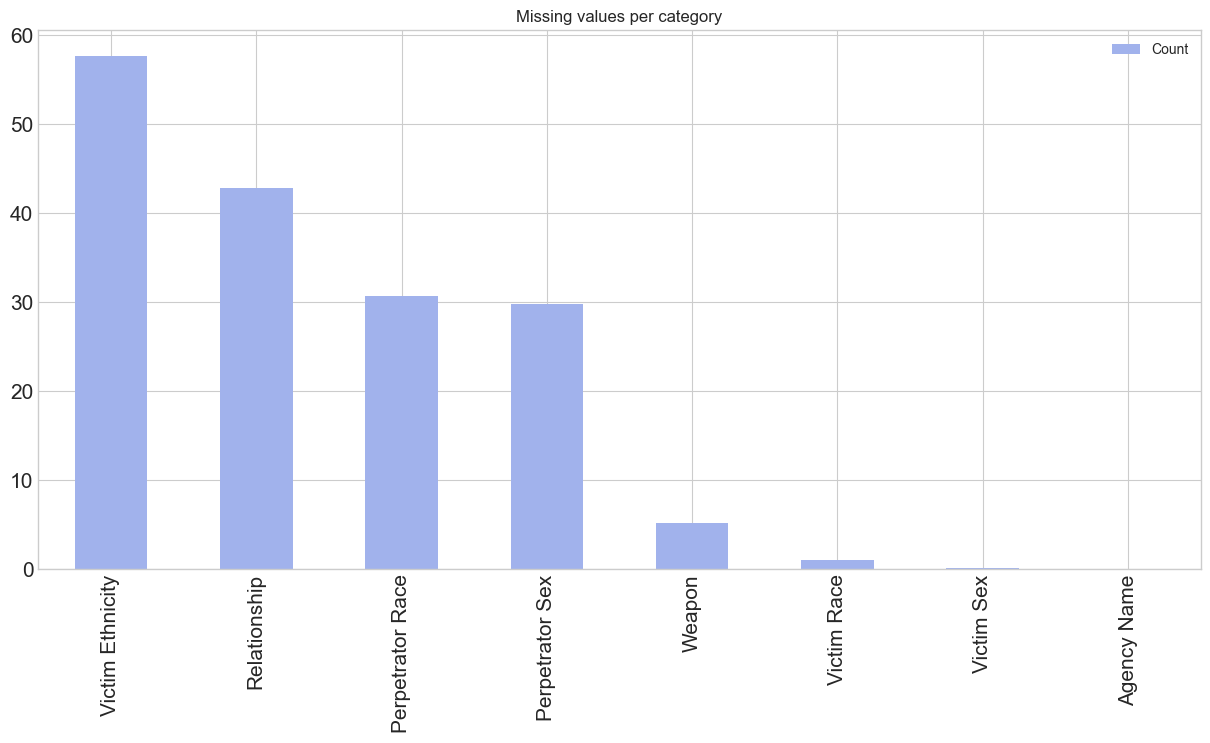

In [10]:
f.print_missing_values(usadf)

In [11]:
# Clasificamos las columnas en dos tipos, categoricas y numericas para tratar de forma diferente los valores nulos.

cat_columns = []
num_columns = []

for col in usadf.columns.values:
    if usadf[col].dtypes == 'int64':
        num_columns += [col]
    else:
        cat_columns += [col]
        
# A las columnas numericas les sacamos su valor medio para reemplazar los valores nulos.
        
median_val = pd.Series(dtype='int64')
for col in num_columns:
    median_val[col] = usadf[col].median()

In [12]:
# a las columnas categoricas les reemplazamos los valores nulos por 'Unknown' y a las numericas por el valor medio con la funcion definida en el archivo python functions.py.
usadf = f.handle_missing_values(usadf, median_val)

In [13]:
# profile = ProfileReport(usadf, title="My Data Profile Report").to_widgets()


<h4>Análisis Exploratorio de Datos (EDA)</h4>

Para realizar el siguiente analisis exploratorio de datos, se tomara como punto de partida las preguntas/hipotesis planteadas en el abstract del presente trabajo.

<h5>¿Cómo es la evolución de la cantidad de crímenes a lo largo de los años?</h5>

<Axes: title={'center': 'Crímenes por año'}, xlabel='Año', ylabel='Cantidad de crímenes'>

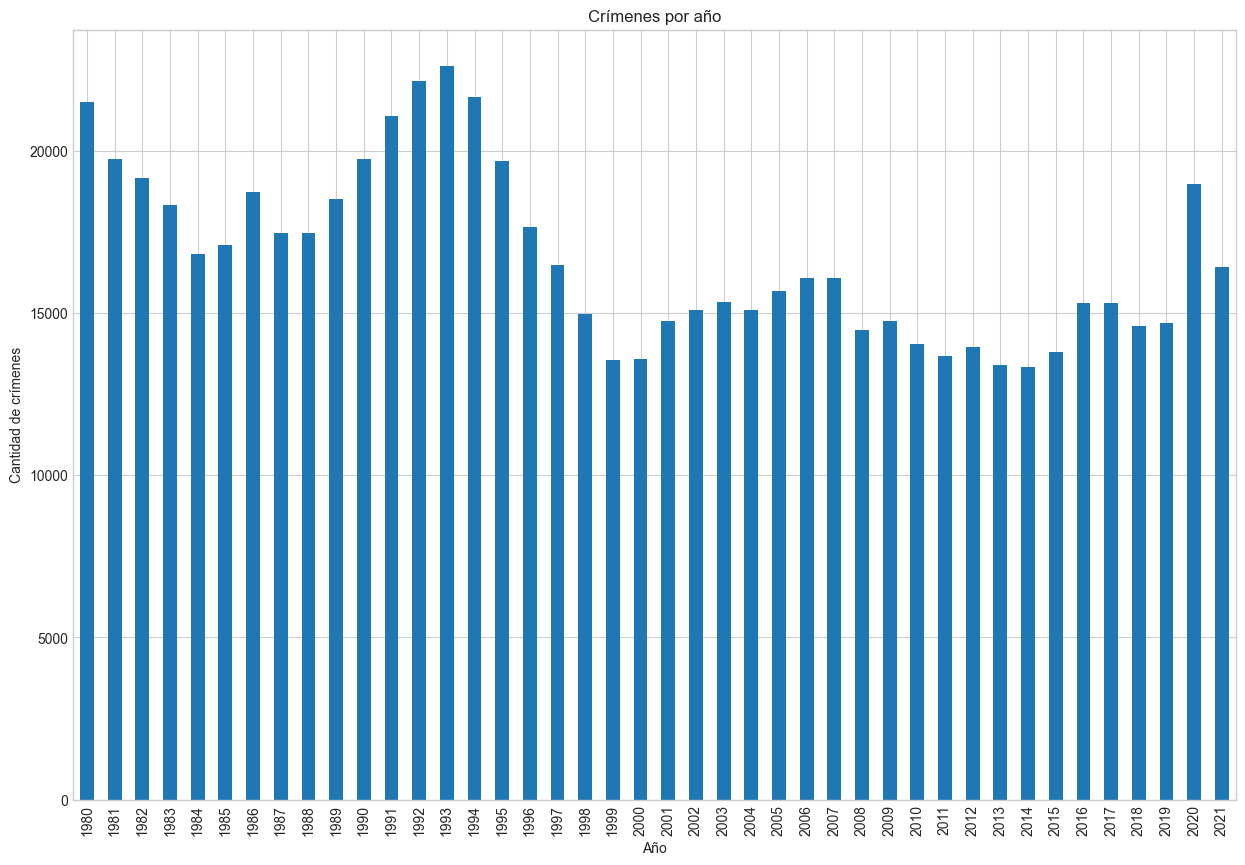

In [14]:
# Adquirimos los crimenes por años del dataset inicial.
crimesperyear = usadf['Year'].value_counts()

# Hacemos una solicitud a la API para obtener los crimenes por años que nos faltarian para completar el dataset.

crimesperyear2 = f.get_API_data('sex', 'victim', 2015, 2021)
crimesperyear2 = crimesperyear2.set_index('data_year')
crimesperyear2 = crimesperyear2.sum(axis=1)

# Juntamos los crimenes por año con los datos anteriores

crimesperyear = pd.concat([crimesperyear, crimesperyear2]).sort_index(ascending=True)

# Graficamos los crimenes por año.
crimesperyear.plot(kind='bar', stacked=True, figsize=(15,10), title='Crímenes por año', xlabel='Año', ylabel='Cantidad de crímenes')



<Axes: title={'center': 'Crímenes por año y sexo del perpetrador'}, xlabel='Año', ylabel='Cantidad de crímenes'>

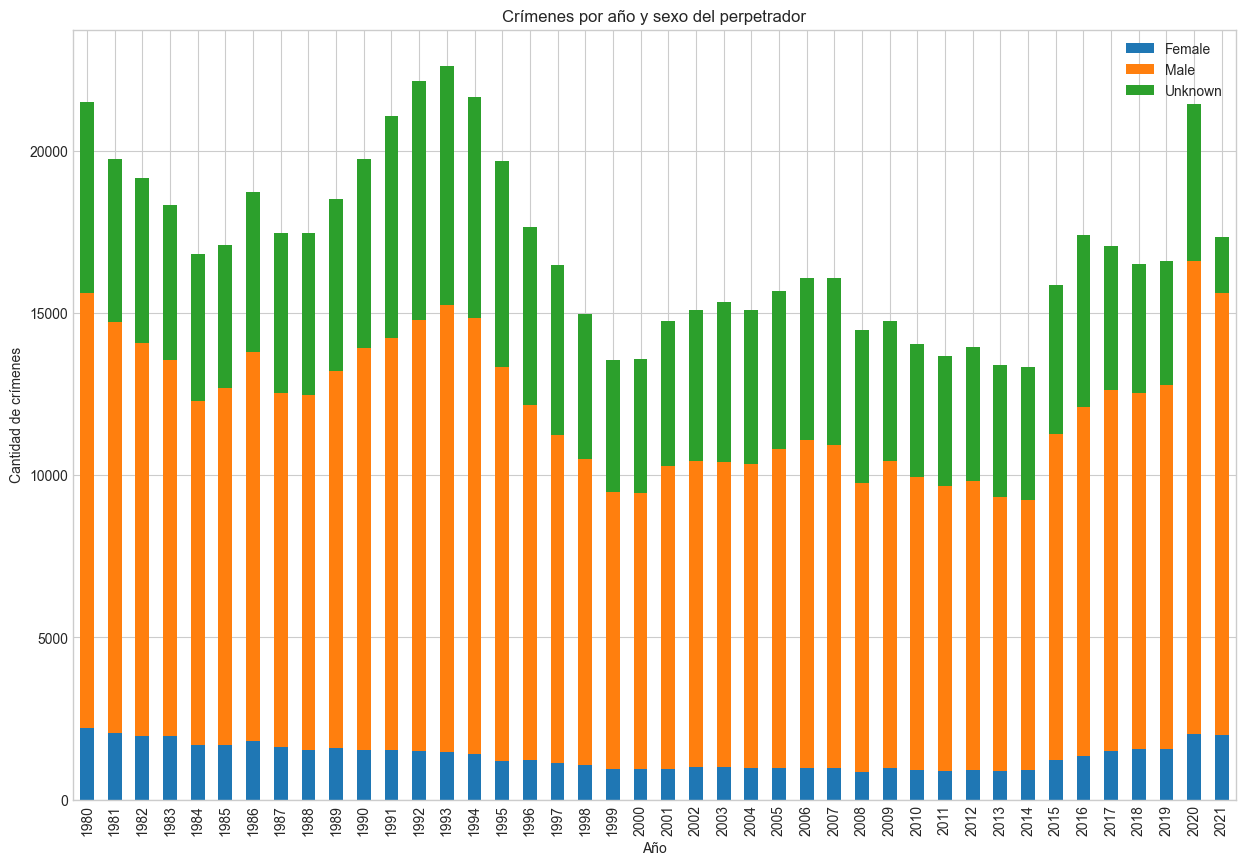

In [15]:
# Graficamos los crimenes agrupados por 'Perpetrator Sex' y por año:
psex = usadf.groupby('Perpetrator Sex')['Year'].value_counts().unstack(0)
psex2 = f.get_API_data('sex','offender', 2015, 2021)
psex2 = psex2.set_index('data_year')
psex = pd.concat([psex, psex2])
psex.plot(kind='bar', stacked=True, figsize=(15,10), title='Crímenes por año y sexo del perpetrador', xlabel='Año', ylabel='Cantidad de crímenes')



C:\Users\54349\AppData\Local\Temp\ipykernel_19496\3804631704.py:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



<Axes: title={'center': 'Crímenes por sexo del perpetrador'}, xlabel='Sexo del perpetrador', ylabel='Cantidad de crímenes'>

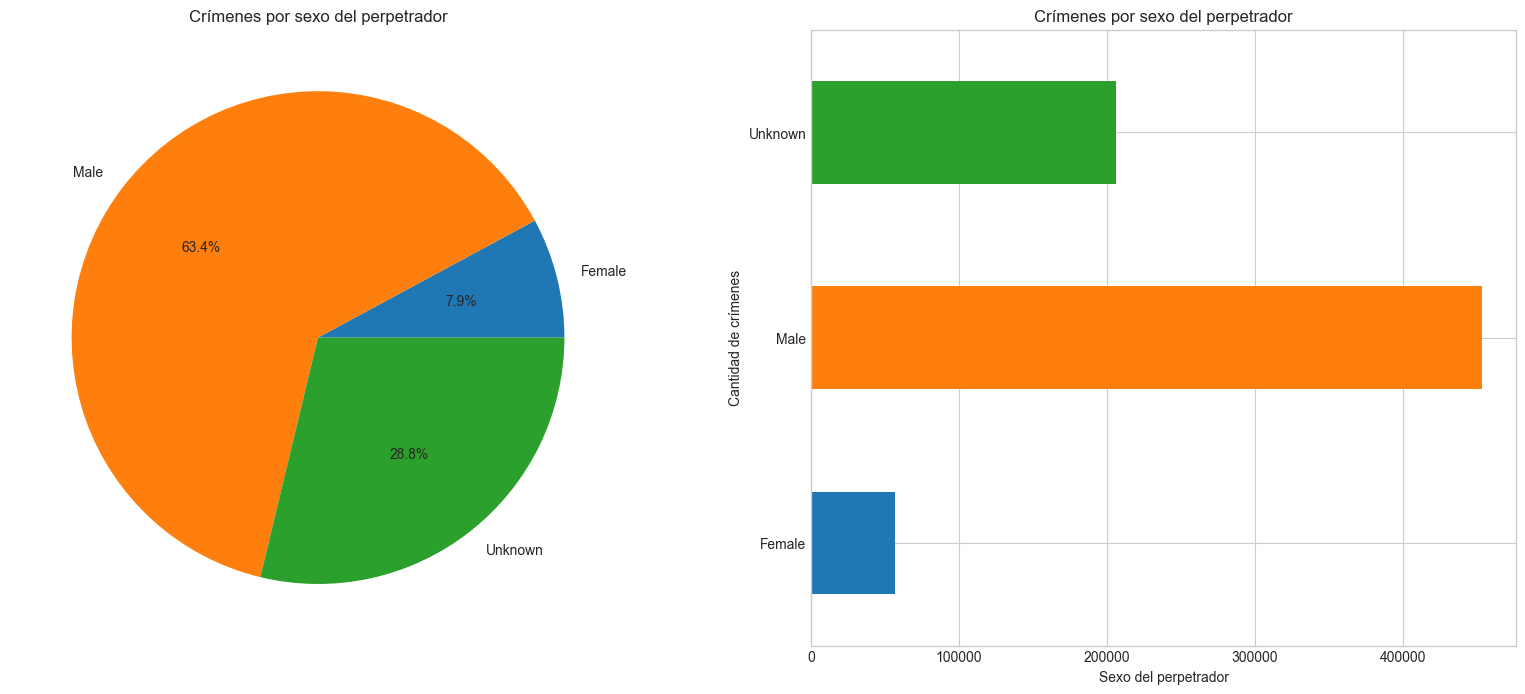

In [16]:
fig, axs = plt.subplots(1,2,figsize=(20,8))
colors = mpl.cm.get_cmap('tab10').colors
psex.sum().plot(kind='pie', ax=axs[0], title='Crímenes por sexo del perpetrador', autopct='%1.1f%%')
psex.sum().plot(kind='barh', ax=axs[1], title='Crímenes por sexo del perpetrador', xlabel='Sexo del perpetrador', ylabel='Cantidad de crímenes', color=colors)


<Axes: title={'center': 'Crímenes por año y raza del perpetrador'}, xlabel='Año', ylabel='Cantidad de crímenes'>

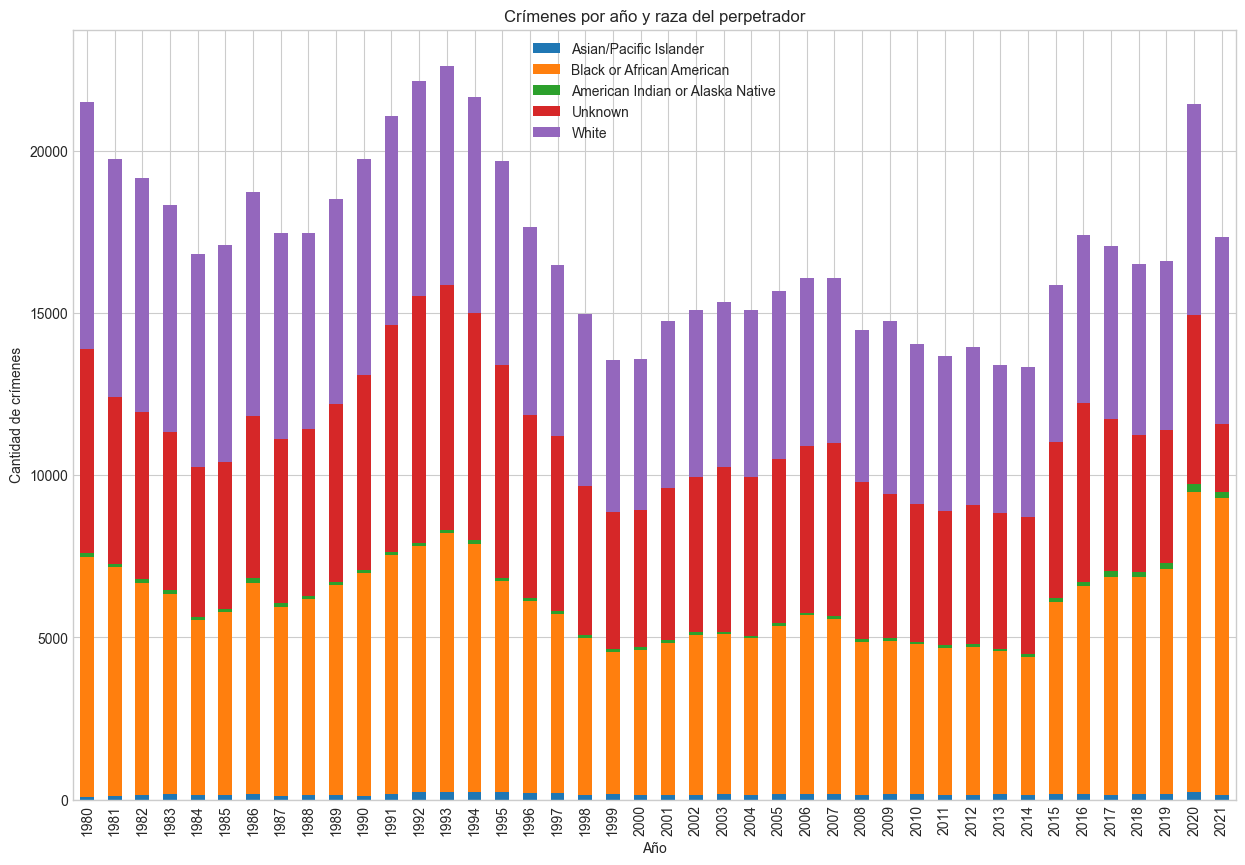

In [17]:
prace = usadf.groupby('Perpetrator Race')['Year'].value_counts().unstack(0)

prace2 = f.get_API_data('race','offender', 2015, 2021).set_index('data_year')
# print(prace.columns)
# print(prace2.columns)

# Como tenemos valores diferentes en los datasets para una misma caracteristica, unificamos los valores para poder graficarlos.
prace = prace.rename(columns={'Native American/Alaska Native': 'American Indian or Alaska Native', 'Black': 'Black or African American'})

# Sumamos la columna Asian y Native Hawaiian para que coincida con el dataset inicial.
prace2['Asian/Pacific Islander'] = prace2['Asian'] + prace2['Native Hawaiian']
prace2.drop(columns=['Asian', 'Native Hawaiian'], inplace=True)

# print(prace2.columns)

# Juntamos los datasets y graficamos.
prace = pd.concat([prace, prace2])
prace.plot(kind='bar', stacked=True, figsize=(15,10), title='Crímenes por año y raza del perpetrador', xlabel='Año', ylabel='Cantidad de crímenes')

C:\Users\54349\AppData\Local\Temp\ipykernel_19496\3132786387.py:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



<Axes: title={'center': 'Crímenes por etnia del perpetrador'}, xlabel='Etnia del perpetrador', ylabel='Cantidad de crímenes'>

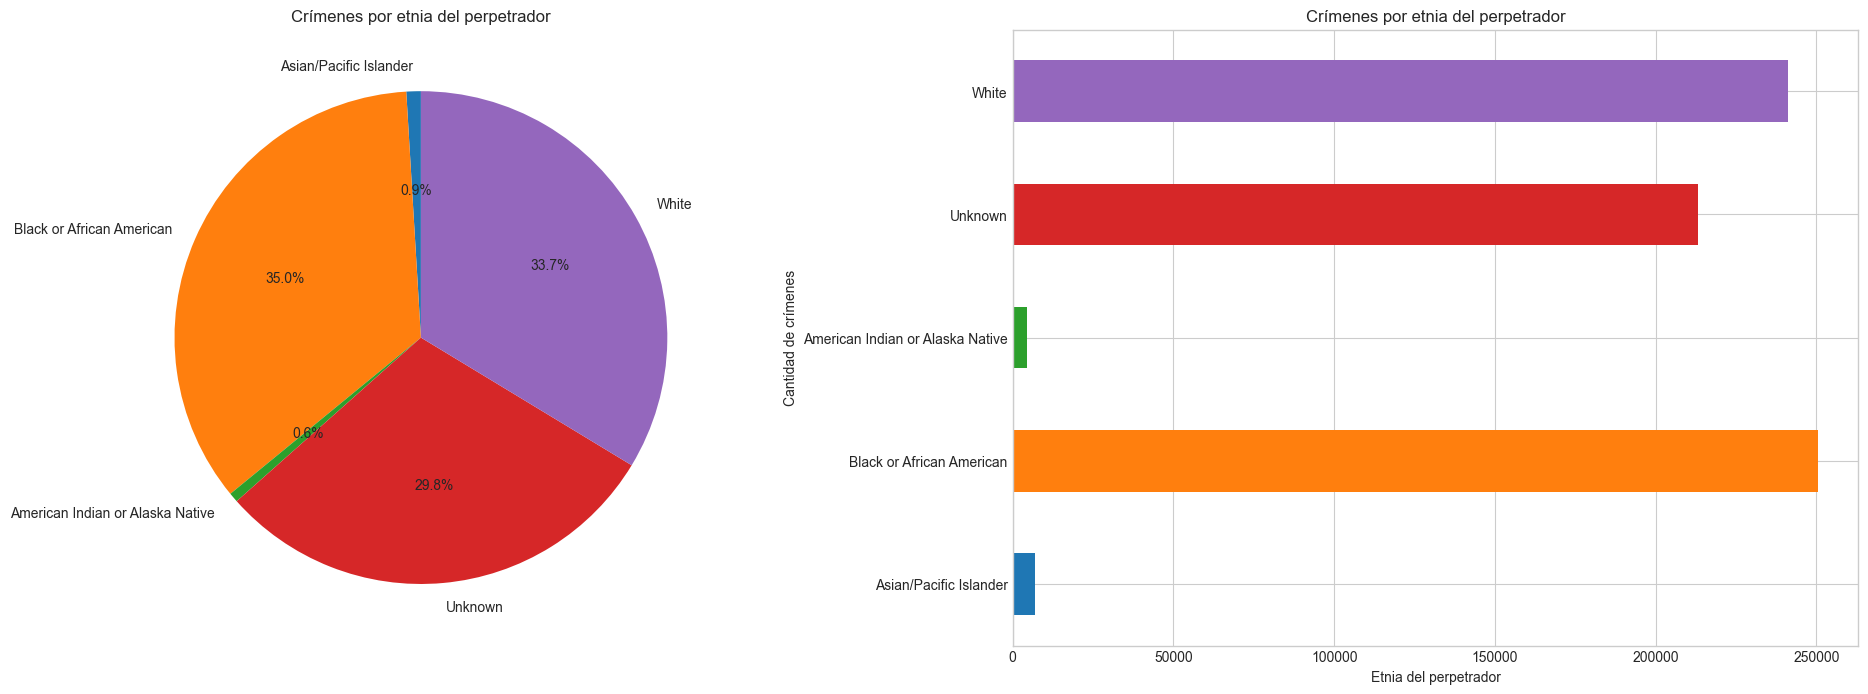

In [18]:
fig, axs = plt.subplots(1,2,figsize=(24,8))
colors = mpl.cm.get_cmap('tab10').colors
prace.sum().plot(kind='pie', ax=axs[0], title='Crímenes por etnia del perpetrador', autopct='%1.1f%%', startangle=90)
prace.sum().plot(kind='barh', ax=axs[1], title='Crímenes por etnia del perpetrador', xlabel='Etnia del perpetrador', ylabel='Cantidad de crímenes', color = colors)


<Axes: title={'center': 'Crímenes por año y sexo de la victima'}, xlabel='Año', ylabel='Cantidad de crímenes'>

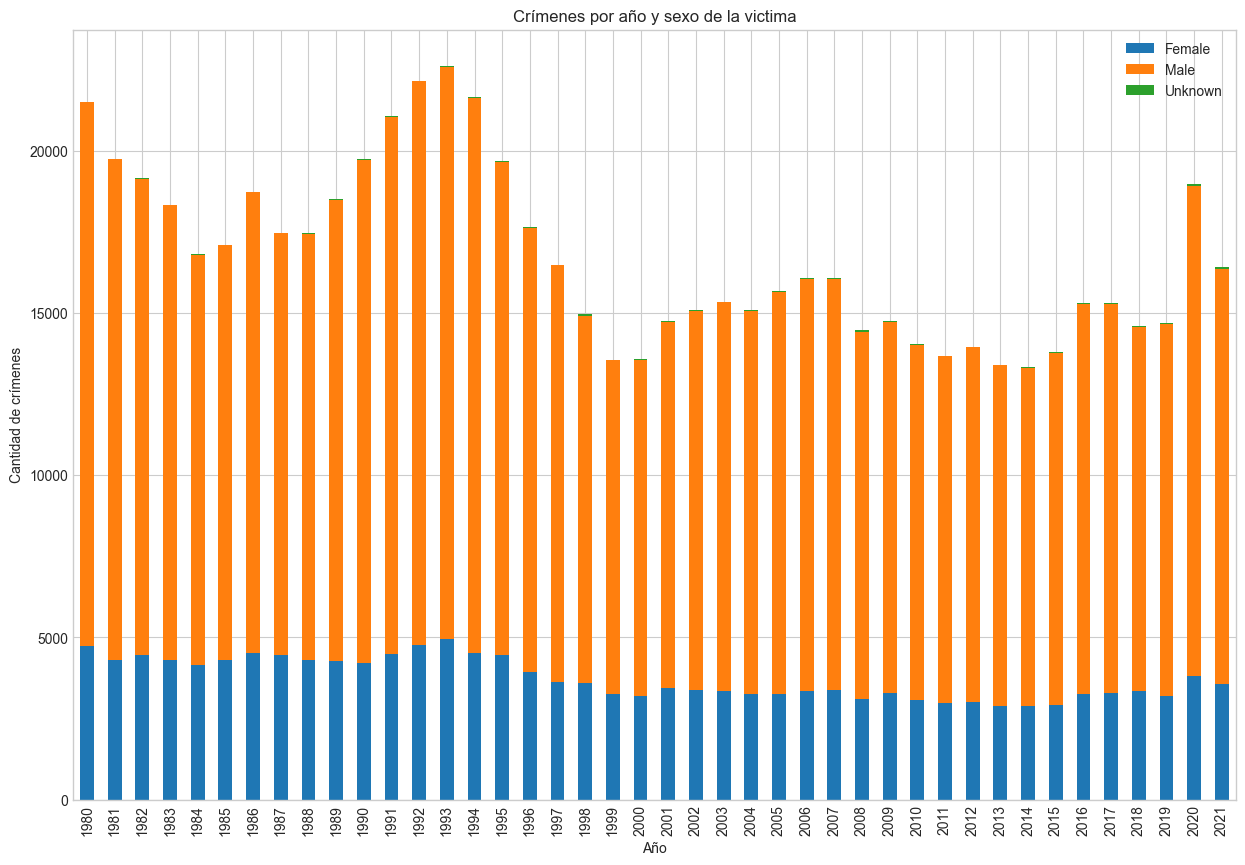

In [19]:
vsex = usadf.groupby('Victim Sex')['Year'].value_counts().unstack(0)
vsex2 = f.get_API_data('sex','victim', 2015, 2021).set_index('data_year')
vsex = pd.concat([vsex, vsex2])
vsex.plot(kind='bar', stacked=True, figsize=(15,10), title='Crímenes por año y sexo de la victima', xlabel='Año', ylabel='Cantidad de crímenes')



<Axes: title={'center': 'Crímenes por sexo de la víctima'}, xlabel='Sexo de la víctima', ylabel='Cantidad de crímenes'>

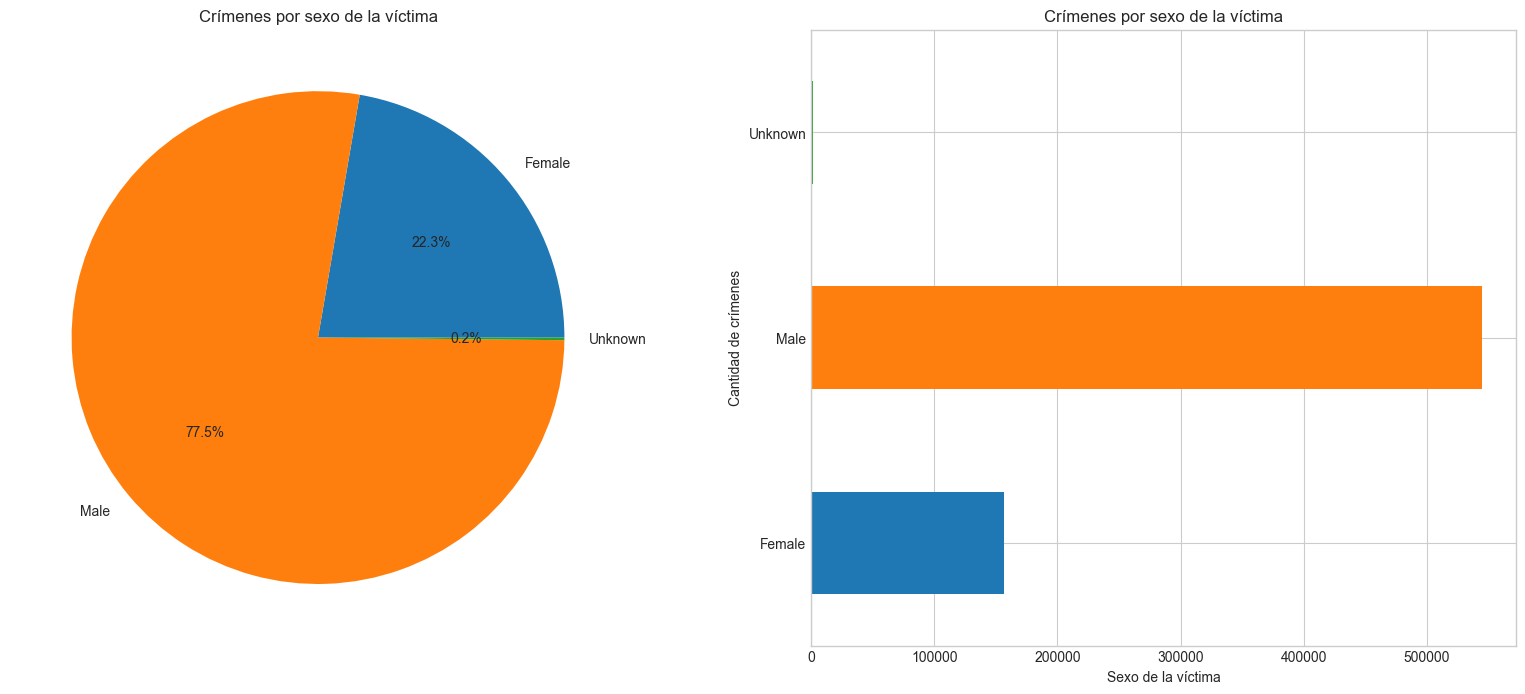

In [20]:
fig, axs = plt.subplots(1,2,figsize=(20,8))

vsex.sum().plot(kind='pie', ax=axs[0], title='Crímenes por sexo de la víctima', autopct='%1.1f%%')
vsex.sum().plot(kind='barh', ax=axs[1], title='Crímenes por sexo de la víctima', xlabel='Sexo de la víctima', ylabel='Cantidad de crímenes', color=colors)


<h5>Distribución de crimenes segun las edades de las victimas</h5>

<Axes: title={'center': 'Crímenes por edad de la victima'}, xlabel='Año', ylabel='Cantidad de crímenes'>

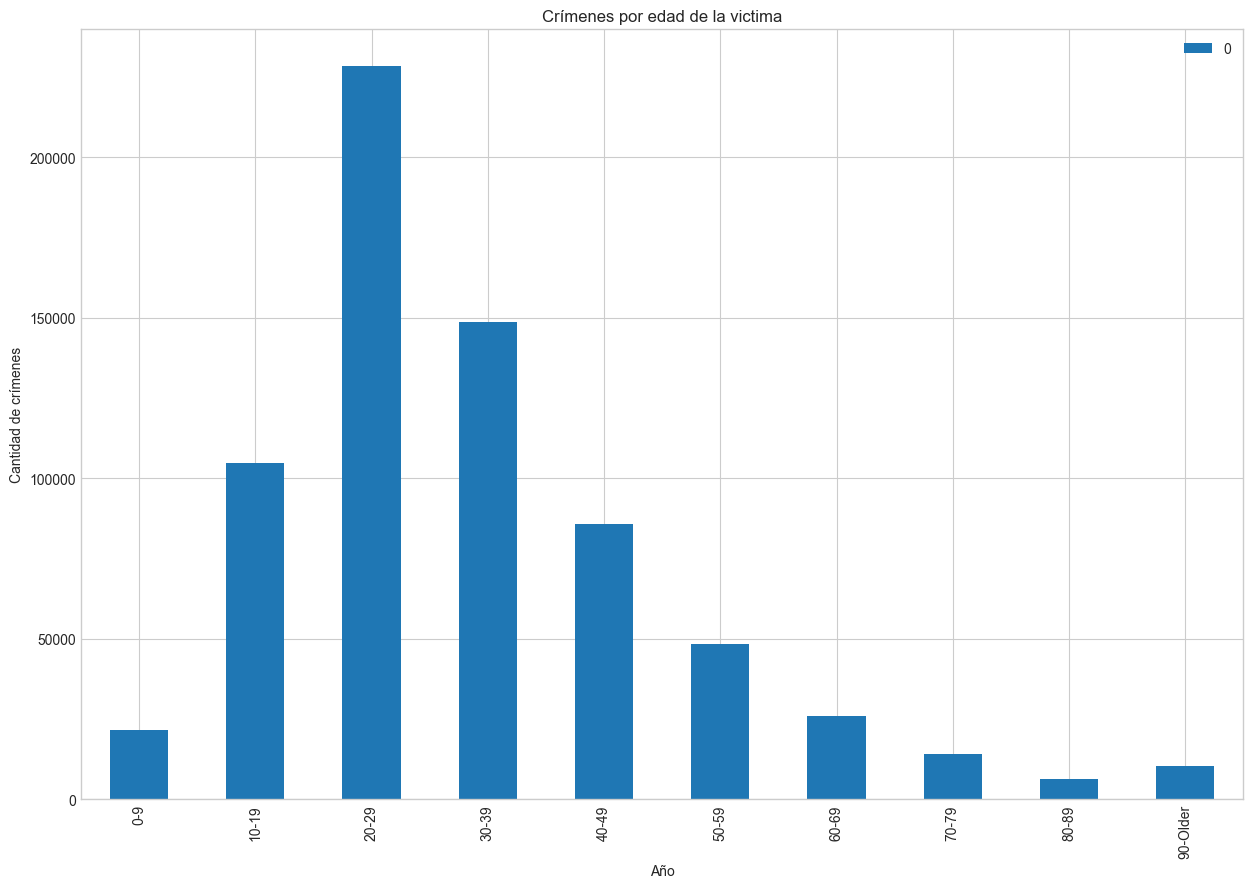

In [21]:
vage = usadf['Victim Age'].groupby(pd.cut(usadf['Victim Age'], np.arange(0, 100, 10))).count()
els2 = pd.DataFrame(usadf['Victim Age'] > 90).sum()
vage = pd.concat([vage, els2])
vage.index = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69','70-79', '80-89', '90-Older']

media = usadf['Victim Age'].mean()

vage2 = f.get_API_data('age','victim', 2015, 2021).set_index('data_year').sum().sort_index(ascending=True)
vage2['30-39'] = vage2.loc[['30-39','Unknown']].sum()
vage2.drop(index='Unknown', inplace=True)

vage = pd.DataFrame(vage + vage2)

vage.plot(kind='bar', stacked=True, figsize=(15,10), title='Crímenes por edad de la victima', xlabel='Año', ylabel='Cantidad de crímenes', )




<h5>Relacion de las victimas y los perpetradores</h5>

                   0
Unknown       254152
Acquaintance  117140
Stranger       89725
Wife           21597
Friend         20376
Girlfriend     15282
Son             9224
Family          8848
Husband         8186
Other          42232


array([<Axes: ylabel='0'>], dtype=object)

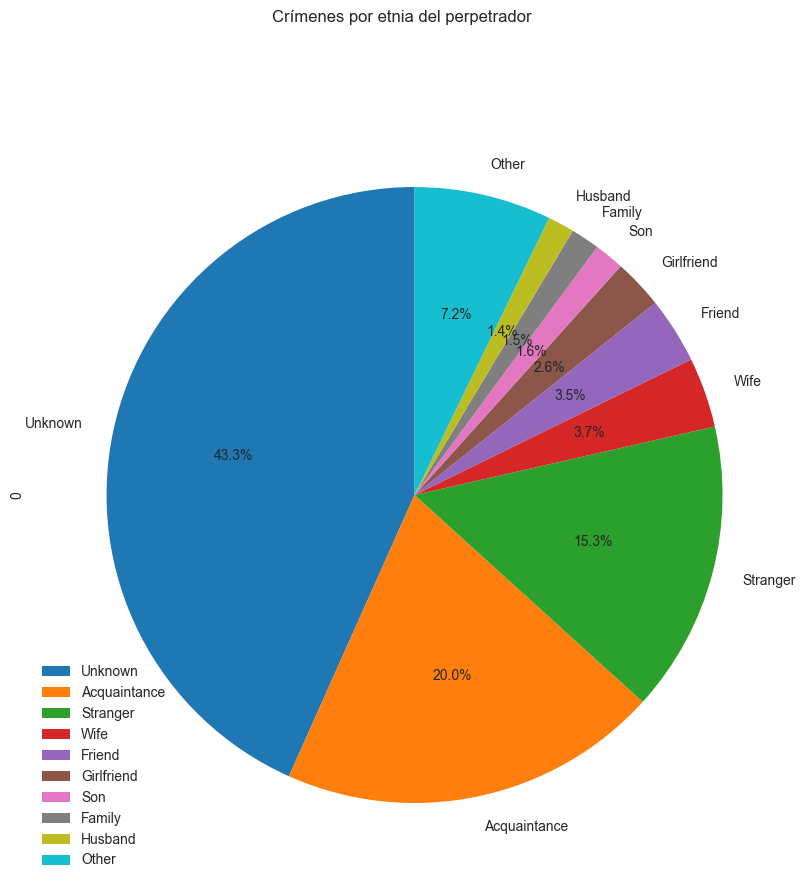

In [22]:
rel = usadf['Relationship'].value_counts()[:9]
rel2 = usadf['Relationship'].value_counts()[10:].sum()
rel = pd.concat([rel, pd.DataFrame([rel2], index=['Other'])])
print(rel)

rel.plot(kind='pie' ,subplots=True, title='Crímenes por etnia del perpetrador', autopct='%1.1f%%', startangle=90, figsize=(10,10))

<h4>Entrenando al modelo para predecir el comportamiento criminal</h4>

<h5>Codificamos las variables no numericas</h5>

In [23]:
#Feature Engineering
categorical_features = cat_columns
categorical_features_idx = [np.where(usadf.columns.values == col)[0][0] for col in categorical_features]
categorical_features_idx

data_encoded = usadf.copy()

categorical_names = {}
encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    le.fit(data_encoded[feature])    
    data_encoded[feature] = le.transform(data_encoded[feature])    
    categorical_names[feature] = le.classes_
    encoders[feature] = le


<h5>Codificamos las variables numericas</h5>

In [24]:
numerical_features = [c for c in usadf.columns.values if c not in categorical_features]
numerical_features.remove('Perpetrator Age')
# crimes_df[numerical_features].info()
numerical_features

for feature in numerical_features:
    val = data_encoded[feature].values[:, np.newaxis]
    mms = MinMaxScaler().fit(val)
    data_encoded[feature] = mms.transform(val)
    encoders[feature] = mms
    
data_encoded = data_encoded.astype(float)

Podemos definir ademas una funcion para decodificar la tabla codificada, y deshacer el paso anterior:

In [25]:
f.decode_dataset(data_encoded, encoders=encoders, numerical_features=numerical_features, categorical_features=categorical_features).head()

,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,Perpetrator Age category
0,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,January,1.0,Murder or Manslaughter,Yes,Male,...,Unknown,Male,15.0,Native American/Alaska Native,Acquaintance,Blunt Object,0.0,0.0,FBI,Young
1,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,March,1.0,Murder or Manslaughter,Yes,Male,...,Unknown,Male,42.0,White,Acquaintance,Strangulation,0.0,0.0,FBI,Adult
2,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,March,2.0,Murder or Manslaughter,No,Female,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,0.0,0.0,FBI,Young
3,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,April,1.0,Murder or Manslaughter,Yes,Male,...,Unknown,Male,42.0,White,Acquaintance,Strangulation,0.0,0.0,FBI,Adult
4,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,April,2.0,Murder or Manslaughter,No,Female,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,0.0,1.0,FBI,Young


In [26]:
# Lo que estamos buscando es predecir comportamiento, pero debemos distinguir aqui que los datos validos en realidad para predecirlo, son los que corresponden a los crimenes resueltos por lo que:

# data_encoded = data_encoded[data_encoded['Crime Solved'] == 1]

In [27]:
# Eliminamos algunas de las variables.
data_perp_sex = data_encoded.drop(['Crime Type','Agency Type','Victim Count','Perpetrator Count','Perpetrator Race','Perpetrator Age category','Perpetrator Age'], axis=1)

In [28]:
privileged_sex = np.where(categorical_names['Victim Sex'] == 'Male')[0]
privileged_race = np.where(categorical_names['Victim Race'] == 'White')[0]
print(privileged_sex,privileged_race)

[1] [4]


In [29]:
data_orig_sex = StandardDataset(data_perp_sex, 
                               label_name='Perpetrator Sex', 
                               favorable_classes=[1], 
                               protected_attribute_names=['Victim Sex', 'Victim Race'], 
                               privileged_classes=[privileged_sex, privileged_race])

In [30]:
f.meta_data(data_orig_sex)

#### Dataset shape

(593763, 14)


#### Dataset feature names

['Agency Name', 'City', 'State', 'Year', 'Month', 'Incident', 'Crime Solved', 'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity', 'Relationship', 'Weapon', 'Record Source']


<h5>Dividimos la muestra</h5>

In [31]:
np.random.seed(42)

data_orig_sex_train, data_orig_sex_test = data_orig_sex.split([0.7], shuffle=True)

display(Markdown("#### Train Dataset shape"))
print("Perpetrator Sex :",data_orig_sex_train.features.shape)
display(Markdown("#### Test Dataset shape"))
print("Perpetrator Sex :",data_orig_sex_test.features.shape)

#### Train Dataset shape

Perpetrator Sex : (415634, 14)


#### Test Dataset shape

Perpetrator Sex : (178129, 14)


<h4>Entrenando al modelo</h4>

In [32]:
# Entrenamos el modelo
rf_orig_sex = RandomForestClassifier().fit(data_orig_sex_train.features, 
                     data_orig_sex_train.labels.ravel(), 
                     sample_weight=data_orig_sex_train.instance_weights)

In [33]:
# Data para el test.
X_test_sex = data_orig_sex_test.features
y_test_sex = data_orig_sex_test.labels.ravel()


<h5>Evaluando la performance del modelo</h5>

<h5>Primero definimos las funciones para mostrar la performance</h5>

#### Accuracy of the model :

0.952596152226757


#### F1 score of the model :

0.9632863180229223


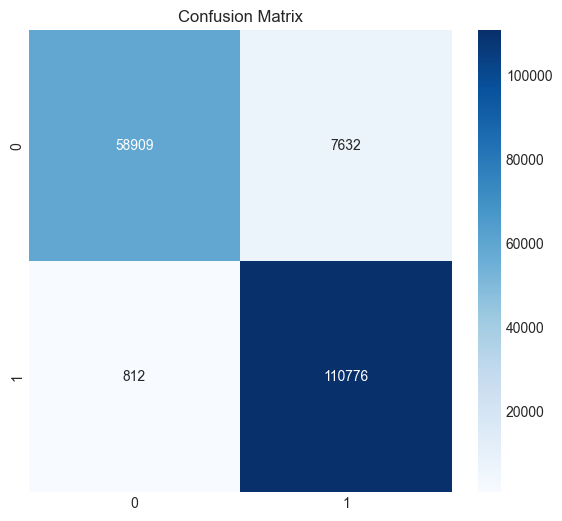

In [34]:
f.plot_model_performance(rf_orig_sex, X_test_sex, y_test_sex)

<h4>Feature importance</h4>

La interpretacion del modelo en este punto se torna cada vez mas importante. Una de las herramientas para interpretar el modelo es realizar un analisis de la importancia de las variables (Feature Importance). La idea es generar un modelo lo mas fiel posible, para generar una respuesta lo mas exacta posible, pero que tambien el modelo sea escalable, utilice la menor cantidad de datos posible, y sea reproducible en otro contexto. 

La importancia de las variables, ademas, cambia con el modelo que usamos. Es importante entender que existen distintas formas de medir dicha importancia.


Como concepto podemos variar el numero de variables consideradas en nuestro modelo evaluado anteriormente. Por ejemplo, sin eliminar las columnas que descartamos, para ver como el modelo ajusta.

In [35]:
#Feature Engineering
data_perp_sex2 = data_encoded
categorical_features = cat_columns
categorical_features_idx = [np.where(usadf.columns.values == col)[0][0] for col in categorical_features]
categorical_features_idx

data_encoded = usadf.copy()

categorical_names = {}
encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    le.fit(data_encoded[feature])    
    data_encoded[feature] = le.transform(data_encoded[feature])    
    categorical_names[feature] = le.classes_
    encoders[feature] = le

In [36]:
numerical_features = [c for c in usadf.columns.values if c not in categorical_features]
numerical_features.remove('Perpetrator Age')
# crimes_df[numerical_features].info()
numerical_features

for feature in numerical_features:
    val = data_encoded[feature].values[:, np.newaxis]
    mms = MinMaxScaler().fit(val)
    data_encoded[feature] = mms.transform(val)
    encoders[feature] = mms
    
data_encoded = data_encoded.astype(float)

In [37]:
privileged_sex = np.where(categorical_names['Victim Sex'] == 'Male')[0]
privileged_race = np.where(categorical_names['Victim Race'] == 'White')[0]

In [38]:
data_orig_sex2 = StandardDataset(data_perp_sex2, 
                               label_name='Perpetrator Sex', 
                               favorable_classes=[1], 
                               protected_attribute_names=['Victim Sex', 'Victim Race'], 
                               privileged_classes=[privileged_sex, privileged_race])

In [39]:
f.meta_data(data_orig_sex2)

#### Dataset shape

(593763, 21)


#### Dataset feature names

['Agency Name', 'Agency Type', 'City', 'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved', 'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity', 'Perpetrator Age', 'Perpetrator Race', 'Relationship', 'Weapon', 'Victim Count', 'Perpetrator Count', 'Record Source', 'Perpetrator Age category']


In [40]:
np.random.seed(42)

data_orig_sex_train2, data_orig_sex_test2 = data_orig_sex2.split([0.7], shuffle=True)

display(Markdown("#### Train Dataset shape"))
print("Perpetrator Sex :",data_orig_sex_train2.features.shape)
display(Markdown("#### Test Dataset shape"))
print("Perpetrator Sex :",data_orig_sex_test2.features.shape)

#### Train Dataset shape

Perpetrator Sex : (415634, 21)


#### Test Dataset shape

Perpetrator Sex : (178129, 21)


In [41]:
rf_orig_sex2 = RandomForestClassifier().fit(data_orig_sex_train2.features, 
                     data_orig_sex_train2.labels.ravel(), 
                     sample_weight=data_orig_sex_train2.instance_weights)

In [42]:
X_test_sex2 = data_orig_sex_test2.features
y_test_sex2 = data_orig_sex_test2.labels.ravel()

#### Accuracy of the model :

0.9541848884796973


#### F1 score of the model :

0.9645209392104268


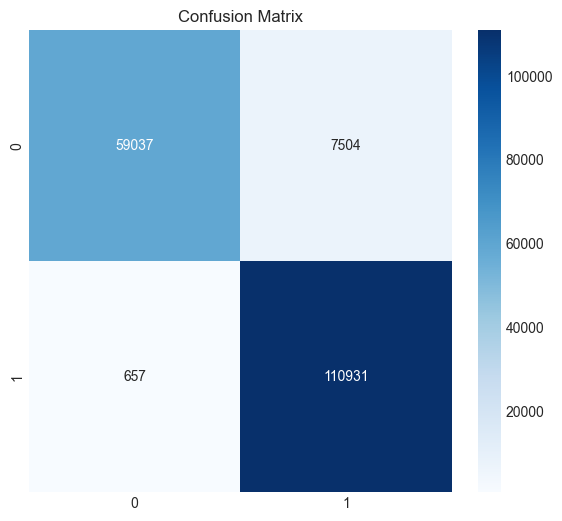

In [43]:
f.plot_model_performance(rf_orig_sex2, data_orig_sex_test2.features, y_test_sex2)

Como conclusión, podemos ver que la discriminacion de las variables categoricas en el primer feature engineering resulta con performance similar que incluyendo todas las variables de nuestro dataset.

Conceptualmente este seria el punto de partida para distintos metodos de evaluacion de la importancia de las variables.

A continuación exponemos algunos metodos para el análisis de la importancia de variables, de acuerdo a distintos modelos:

<h5>Regresión lineal</h5>

Para el modelo de regresión lineal, se puede plantear un modelo en el cual se coloque un coeficiente de importancia para cada variable. El vector de coeficientes representara la influencia de dicha variable en el modelo.

<center><img src="./img/formula1.jpg"/></center>


<h5>Tree models</h5>

Uno de los metodos mas usados para modelos de arbol, en la determinacion de la importancia de las variables es Gini Importance or Mean Decrease in Impurity (MDI).

<center><img src="./img/diagram.jpg"/></center>

MDI cuenta la cantidad de veces que una variable es usada en un nodo para dividir el subconjunto, generando un peso de acuerdo al numero de veces que dicha variable fue utilizada para ello.

Esto esta representado en la siguiente formula:

<center><img src="./img/formula2.jpg"/></center>
 
De acuerdo a esto podemos analizar la importancia de las variables en nuestro modelo.

In [44]:
rf_orig_sex2.feature_importances_
feature_imp = pd.Series(rf_orig_sex2.feature_importances_, index=data_orig_sex2.feature_names)
feature_imp.sort_values(ascending=False, inplace=True)

In [50]:
def get_trace(series, color='#2980b9'):
    series.sort_values(ascending=True, inplace=True)
    x, y = series.values, series.index
    trace = go.Bar(x=x, y=y, marker=dict(color=color), opacity=0.9, orientation='h')
    return trace

trace = get_trace(feature_imp)
layout = go.Layout(barmode='group', title='Feature Importance', yaxis=go.layout.YAxis(automargin=True))
fig = go.Figure([trace], layout=layout)
py.iplot(fig)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
print(feature_imp)

Record Source               0.001126
Crime Type                  0.001236
Victim Count                0.003146
Agency Type                 0.004805
Victim Ethnicity            0.005036
Victim Race                 0.006368
Victim Sex                  0.006707
Perpetrator Count           0.013825
Weapon                      0.015905
Incident                    0.016684
Month                       0.017321
State                       0.017338
City                        0.021540
Agency Name                 0.022476
Year                        0.022861
Victim Age                  0.034719
Perpetrator Age category    0.042471
Perpetrator Race            0.119643
Relationship                0.145051
Perpetrator Age             0.224568
Crime Solved                0.257172
dtype: float64


Podemos ver en orden decreciente, la importancia de las variables. En este punto podriamos preguntarnos si es necesario evaluar el modelo con todas las variables o podriamos prescindir de las que tienen menos importancia. Esto ademas dependeria de lo que queremos predecir, por lo que no habria un criterio unificado.

<h5>Eliminación de variables segun la importancia de las mismas</h5>

Para evaluar la performance del modelo, eliminaremos las variables que tienen menos importancia, segun su valor relativo, como asi tambien las que queremos predecir, correspondientes al perpetrador y compararemos ambos.

In [51]:
data_perp_sex3 = data_encoded.drop(['Perpetrator Age category','Record Source','Crime Type','Agency Type','Victim Count','Victim Ethnicity','Perpetrator Age', 'Perpetrator Race','Perpetrator Count'], axis=1)
#data_perp_sex3 = data_encoded
categorical_features = cat_columns
categorical_features_idx = [np.where(usadf.columns.values == col)[0][0] for col in categorical_features]
categorical_features_idx

data_encoded = usadf.copy()

categorical_names = {}
encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    le.fit(data_encoded[feature])    
    data_encoded[feature] = le.transform(data_encoded[feature])    
    categorical_names[feature] = le.classes_
    encoders[feature] = le
    
numerical_features = [c for c in usadf.columns.values if c not in categorical_features]
numerical_features.remove('Perpetrator Age')
# crimes_df[numerical_features].info()
numerical_features

for feature in numerical_features:
    val = data_encoded[feature].values[:, np.newaxis]
    mms = MinMaxScaler().fit(val)
    data_encoded[feature] = mms.transform(val)
    encoders[feature] = mms
    
data_encoded = data_encoded.astype(float)

privileged_sex = np.where(categorical_names['Victim Sex'] == 'Male')[0]
privileged_race = np.where(categorical_names['Victim Race'] == 'White')[0]

data_orig_sex3 = StandardDataset(data_perp_sex3, 
                               label_name='Perpetrator Sex', 
                               favorable_classes=[1], 
                               protected_attribute_names=['Victim Sex', 'Victim Race'], 
                               privileged_classes=[privileged_sex, privileged_race])

In [52]:
np.random.seed(42)

data_orig_sex_train3, data_orig_sex_test3 = data_orig_sex3.split([0.7], shuffle=True)

display(Markdown("#### Train Dataset shape"))
print("Perpetrator Sex :",data_orig_sex_train3.features.shape)
display(Markdown("#### Test Dataset shape"))
print("Perpetrator Sex :",data_orig_sex_test3.features.shape)

#### Train Dataset shape

Perpetrator Sex : (415634, 12)


#### Test Dataset shape

Perpetrator Sex : (178129, 12)


In [53]:
rf_orig_sex3 = RandomForestClassifier().fit(data_orig_sex_train3.features, 
                     data_orig_sex_train3.labels.ravel(), 
                     sample_weight=data_orig_sex_train3.instance_weights)

In [54]:
X_test_sex3 = data_orig_sex_test3.features
y_test_sex3 = data_orig_sex_test3.labels.ravel()

#### Accuracy of the model :

0.9536234975775982


#### F1 score of the model :

0.9640527568546053


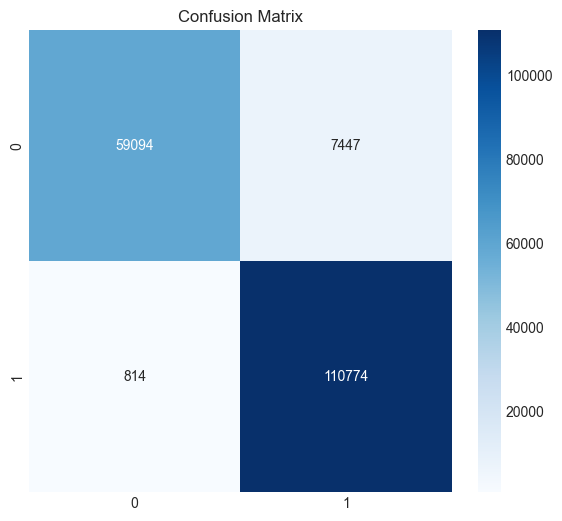

In [55]:
f.plot_model_performance(rf_orig_sex3, data_orig_sex_test3.features, y_test_sex3)

In [56]:
rf_orig_sex3.feature_importances_
feature_imp3 = pd.Series(rf_orig_sex3.feature_importances_, index=data_orig_sex3.feature_names)
feature_imp3.sort_values(ascending=False, inplace=True)

In [57]:
def get_trace(series, color='#2980b9'):
    series.sort_values(ascending=True, inplace=True)
    x, y = series.values, series.index
    trace = go.Bar(x=x, y=y, marker=dict(color=color), opacity=0.9, orientation='h')
    return trace

trace = get_trace(feature_imp3)
layout = go.Layout(barmode='group', title='Feature Importance', yaxis=go.layout.YAxis(automargin=True))
fig = go.Figure([trace], layout=layout)
py.iplot(fig)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Podemos concluir que es mejor quitar muchas de las variables de nuestro dataset, de esta forma nuestro modelo es mas rapido, mas escalable y produce resultados excelentes con menos variables.

<h5>Validacion del modelo</h5>

<h5>StratifiedKFold</h5>

Usaremos un analisis de StratifiedKFold para evaluar nuestro modelo, partiendo nuestro dataset en 10 submuestras y evaluando el entrenamiento y la prediccion para cada conjunto de analisis.

In [58]:
X, y = data_orig_sex3.features, data_orig_sex3.labels.ravel()
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=False, random_state=None)
ac_vector = []
for i, j in cv.split(X, y):
    train, test = data_perp_sex3.iloc[i], data_perp_sex3.iloc[j]
    
    train = StandardDataset(train, 
                               label_name='Perpetrator Sex', 
                               favorable_classes=[1], 
                               protected_attribute_names=['Victim Sex', 'Victim Race'], 
                               privileged_classes=[privileged_sex, privileged_race])
    test = StandardDataset(test, 
                               label_name='Perpetrator Sex', 
                               favorable_classes=[1], 
                               protected_attribute_names=['Victim Sex', 'Victim Race'], 
                               privileged_classes=[privileged_sex, privileged_race])
    
    rf = RandomForestClassifier().fit(train.features, train.labels.ravel(), sample_weight=train.instance_weights)
    y_pred = rf.predict(test.features)
    probs = rf.predict_proba(test.features)
    f.get_model_performance(test.features, test.labels.ravel(), y_pred, probs )
    ac_vector.append(accuracy_score(test.labels.ravel(), y_pred))
    



In [59]:
np.mean(ac_vector), np.std(ac_vector)

(0.9489223936734119, 0.007224916353051442)

Como conclusión de nuestro proyecto final, podemos concluir que hemos generado un modelo capaz de estimar distintas caracteristicas del perpetrador (en este caso se evaluo el sexo principalmente), de acuerdo a otras caracteristicas de los crimenes presentes en el dataset. Esto es algo util, considerando que puede ser un gran complemento a la hora de seguir pistas por parte de las agencias que investigan los crimenes, como asi tambien como analisis para la reduccion de crimenes en el futuro.